In [6]:
import cx_Oracle
import pandas as pd
import os
import re

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [9]:
import nltk
from konlpy.tag import Twitter

In [2]:
os.putenv('NLS_LANG', '.UTF8')
connection = cx_Oracle.connect('hr', '1234', 'localhost/xe')
cursor = connection.cursor()

In [3]:
blog_df = pd.read_sql("select * from blog_info", connection)

In [4]:
blog_df.head()

,NUM,TITLE,DESCRIPTION,BLOGGERNAME,LINK
0,69,여성반지갑 여자친구 선물로도 좋은 라피예뜨 빠삐용 지퍼반지갑,여성반지갑 여자친구 선물용으로도 좋은 라피예뜨 반지갑 제가 지갑을 잘 안가지고 다니...,정여니의 소소한 일상(Don&quot;t worry Be happy!),https://blog.naver.com/kyoung8932
1,70,20대 여자친구 선물 다니엘웰링턴 할인코드로 저렴하게,"남자친구 여자친구가 있다면 20대 여자친구 선물 , 남자친구 선물로도 너무 좋을 듯...",MINSAIMDANG,https://blog.naver.com/dpcyxl1514
2,71,크리스마스 여자친구 선물 추천_10만원대 가방 폴스부띠끄...,"이렇게 폴스부띠끄 테디백, 딜런백 크리스마스 여자친구 선물로 추천 드렸는데 어떠신가...",차카니의 잡다한 일상과 드라마리뷰,https://blog.naver.com/alsk1130
3,72,"여자귀걸이 추천(feat. 스퀘어... 오늘도 아름답다, 여자친구선물)",naver.com 명함 정보도 참고하셔요 :) #오늘도아름답다 #스퀘어별똥별귀걸이 ...,Life of Heomi :-),https://blog.naver.com/9542185
4,73,가성비 좋은 여자친구 선물 / 더 벨루스 조말론 우드 세이지 앤...,선물용으로 넘 좋은 향수! #가성비 좋은 선물 #여자친구선물로 좋은 #더벨루스 조말...,Helena&quot;s ordinary,https://blog.naver.com/helenabonbon


In [7]:
pattern = "[^\w\s]"
blog_text = [re.sub(pattern=pattern, repl='', string=text) for text in blog_df['DESCRIPTION']]
blog_text

['여성반지갑 여자친구 선물용으로도 좋은 라피예뜨 반지갑 제가 지갑을 잘 안가지고 다니는 편입니다 빠삐용 지퍼반지갑은 색상이 모두 다 괜찮은 것 같아요 색상은 여자친구나 여성분들에게 선물할 때 ',
 '남자친구 여자친구가 있다면 20대 여자친구 선물  남자친구 선물로도 너무 좋을 듯해요 포장도 참 고급스럽죠 저는 리본을 풀어야 하는건줄 알았는데 아니였어요 앞면 쪽에 자석으로 닫혀있는거라 손쉽게 ',
 '이렇게 폴스부띠끄 테디백 딜런백 크리스마스 여자친구 선물로 추천 드렸는데 어떠신가요 그리고 자기자신에게 선물로도 추천드립니다 저도 폴스부띠끄 미니백 가지고 있는데 가볍구 간단하게 물건들 ',
 'navercom 명함 정보도 참고하셔요  오늘도아름답다 스퀘어별똥별귀걸이 골드 골드귀걸이 여자귀걸이 귀걸이추천 연말귀걸이 악세사리 여자친구선물 화려한귀걸이 귀걸이코디',
 '선물용으로 넘 좋은 향수 가성비 좋은 선물 여자친구선물로 좋은 더벨루스 조말론 우드 세이지 조말론 우드세이지앤씨솔트 조말론향수 여자친구향수 향수선물 향수추천',
 '겨울엔 따뜻한 커피 한잔 선물하세요  한가로와 머그드립백세트 마음을 전할 여자친구선물 뭘 하면 좋을까 고민하시는 분들에게 작은 팁 하나 드릴까 합니다 드립백커피 매력에 빠져서 다양한 종류의 ',
 '고급스럽고 클래식한 느낌이라 데일리로 착용하기 좋아 여자친구 시계 선물로 추천하고 싶은 디자인이에요 6시 방향에 이탤릭 체로 적힌 Le Locle 덕분에 유럽의 낭만적인 분위기가 전해지는 것 같기도 하고 ',
 '부족해 선물은 생각도 못했었는데 남자친구가 어렵게 아르바이트 해서 번 돈으로 건내준 패션가죽시계 하나만으로도 가슴 뛰던 순수한 시설이 제게도 있긴 했네요ㅋㅋㅋㅋ 20대여자친구선물 가죽시계 ',
 'ITquotS FOR YOU 여자친구선물만들기 가죽카드지갑 with 꼰노이 여자친구선물을 만들기위해꼰노이에 군대에서 막 전역한 멋진 청년이사랑하는 여자친구를 위해서다소곳이 앉아 미싱을 하네요 ㅎㅎ 그런데 진짜 ',
 '다가 올 크리스마스 여자

In [10]:
twitter = Twitter()

C:\ai\python\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [11]:
tag_list = []
for text in blog_text:
    tagged = twitter.pos(text, stem=True)
    for i in range(0, len(tagged)):
        tag_list.append(tagged[i][0])
tag_list

['여',
 '성',
 '반',
 '지갑',
 '여자친구',
 '선물',
 '용',
 '으로도',
 '좋다',
 '라피',
 '예',
 '뜨다',
 '반',
 '지갑',
 '제',
 '가',
 '지갑',
 '을',
 '자다',
 '알다',
 '다니다',
 '편입',
 '니',
 '다',
 '빠삐용',
 '지퍼',
 '반',
 '지갑',
 '은',
 '색상',
 '이',
 '모두',
 '다',
 '괜찮다',
 '것',
 '같다',
 '색상',
 '은',
 '여자친구',
 '나',
 '여성',
 '분들',
 '에게',
 '선물',
 '하다',
 '때',
 '남자친구',
 '여자친구',
 '가',
 '있다',
 '20',
 '대다',
 '여자친구',
 '선물',
 '남자친구',
 '선물',
 '로',
 '도',
 '너무',
 '좋다',
 '듯',
 '하다',
 '포장',
 '도',
 '차다',
 '고급스럽다',
 '저',
 '는',
 '리본',
 '을',
 '풀다',
 '하다',
 '줄',
 '알다',
 '아니다',
 '앞',
 '면',
 '쪽',
 '에',
 '자석',
 '으로',
 '닫히다',
 '손쉽다',
 '이렇게',
 '폴스부띠끄',
 '테디',
 '백',
 '딜런백',
 '크리스마스',
 '여자친구',
 '선물',
 '로',
 '추천',
 '드리다',
 '어떻다',
 '가요',
 '그리고',
 '자기',
 '자신',
 '에게',
 '선물',
 '로',
 '도',
 '추천',
 '드리다',
 '저',
 '도',
 '폴스부띠끄',
 '미니',
 '백',
 '가지',
 '고',
 '있다',
 '가볍다',
 '간단하다',
 '물건',
 '들',
 'navercom',
 '명함',
 '정보',
 '도',
 '참고',
 '하다',
 '오늘',
 '도',
 '아름답다',
 '스퀘어',
 '별똥별',
 '귀걸이',
 '골드',
 '골드',
 '귀걸이',
 '여자',
 '귀걸이',
 '귀걸이',
 '추천',
 '연말',
 '귀걸이',
 '악세사리',
 '여자친구',
 '

In [12]:
tag_list=[tag for tag in tag_list if len(tag)>=2]
tag_list

['지갑',
 '여자친구',
 '선물',
 '으로도',
 '좋다',
 '라피',
 '뜨다',
 '지갑',
 '지갑',
 '자다',
 '알다',
 '다니다',
 '편입',
 '빠삐용',
 '지퍼',
 '지갑',
 '색상',
 '모두',
 '괜찮다',
 '같다',
 '색상',
 '여자친구',
 '여성',
 '분들',
 '에게',
 '선물',
 '하다',
 '남자친구',
 '여자친구',
 '있다',
 '20',
 '대다',
 '여자친구',
 '선물',
 '남자친구',
 '선물',
 '너무',
 '좋다',
 '하다',
 '포장',
 '차다',
 '고급스럽다',
 '리본',
 '풀다',
 '하다',
 '알다',
 '아니다',
 '자석',
 '으로',
 '닫히다',
 '손쉽다',
 '이렇게',
 '폴스부띠끄',
 '테디',
 '딜런백',
 '크리스마스',
 '여자친구',
 '선물',
 '추천',
 '드리다',
 '어떻다',
 '가요',
 '그리고',
 '자기',
 '자신',
 '에게',
 '선물',
 '추천',
 '드리다',
 '폴스부띠끄',
 '미니',
 '가지',
 '있다',
 '가볍다',
 '간단하다',
 '물건',
 'navercom',
 '명함',
 '정보',
 '참고',
 '하다',
 '오늘',
 '아름답다',
 '스퀘어',
 '별똥별',
 '귀걸이',
 '골드',
 '골드',
 '귀걸이',
 '여자',
 '귀걸이',
 '귀걸이',
 '추천',
 '연말',
 '귀걸이',
 '악세사리',
 '여자친구',
 '선물',
 '화려하다',
 '귀걸이',
 '귀걸이',
 '코디',
 '선물',
 '으로',
 '넘다',
 '좋다',
 '향수',
 '가성',
 '좋다',
 '선물',
 '여자친구',
 '선물',
 '좋다',
 '벨루스',
 '조말',
 '우드',
 '세이지',
 '조말',
 '우드',
 '세이지',
 '솔트',
 '조말',
 '향수',
 '여자친구',
 '향수',
 '향수',
 '선물',
 '향수',
 '추천',
 '겨울',
 '따뜻하다',
 '커피',
 '

In [13]:
ko = nltk.Text(tag_list)
ko.vocab().most_common(100)

[('선물', 2353),
 ('여자친구', 1517),
 ('하다', 1049),
 ('추천', 399),
 ('좋다', 378),
 ('있다', 362),
 ('여자', 277),
 ('크리스마스', 206),
 ('시계', 202),
 ('으로', 182),
 ('같다', 181),
 ('목걸이', 181),
 ('꽃다발', 181),
 ('20', 162),
 ('에게', 160),
 ('보다', 160),
 ('이다', 160),
 ('되다', 159),
 ('남자친구', 156),
 ('받다', 152),
 ('향수', 151),
 ('생일', 143),
 ('예쁘다', 142),
 ('귀걸이', 130),
 ('꽃집', 130),
 ('대다', 124),
 ('친구', 115),
 ('싶다', 113),
 ('고민', 111),
 ('들다', 111),
 ('해주다', 110),
 ('좋아하다', 107),
 ('너무', 106),
 ('제품', 105),
 ('드리다', 103),
 ('디자인', 100),
 ('기념일', 95),
 ('준비', 94),
 ('분들', 93),
 ('에서', 93),
 ('주다', 93),
 ('없다', 90),
 ('팔찌', 84),
 ('다니엘', 83),
 ('많다', 80),
 ('오늘', 79),
 ('주문', 79),
 ('않다', 78),
 ('아니다', 77),
 ('화이트데이', 76),
 ('많이', 75),
 ('웰링턴', 73),
 ('주얼리', 72),
 ('하고', 71),
 ('이나', 71),
 ('어떻다', 68),
 ('가격', 68),
 ('플라워', 68),
 ('자다', 67),
 ('센스', 67),
 ('해드리다', 65),
 ('quot', 64),
 ('정말', 62),
 ('이번', 61),
 ('ㅎㅎ', 59),
 ('해보다', 59),
 ('안녕하다', 59),
 ('연말', 58),
 ('브랜드', 57),
 ('남자', 57),
 ('할인', 56),
 ('여

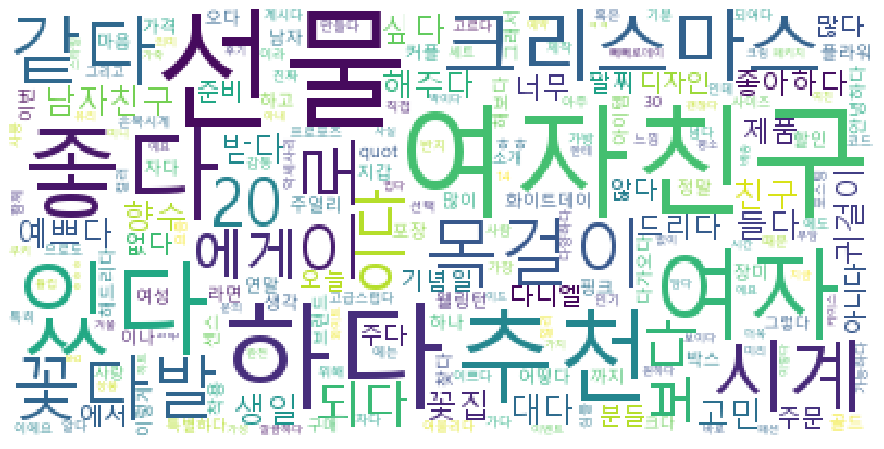

In [17]:
data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                     relative_scaling = 0.2,
                     stopwords = STOPWORDS,
                     background_color = 'white',).generate_from_frequencies(dict(data))
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()